# Optimizing Ad Bidding: Facebook's A/B Test Story

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 28px; font-weight: bold; text-align: justify; color: #555;">Introduction:</h2>
<p style="font-size: 16px;">Our company is at the forefront of Facebook advertising, constantly seeking innovative strategies to maximize our reach and impact. In our latest endeavor, we're delving into the realm of ad bidding, specifically comparing Facebook's new "average bidding" system to the established "maximum bidding" approach. This experiment aims to uncover the most effective method for achieving our advertising goals and driving engagement and sales.</p>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 28px; font-weight: bold; text-align: justify; color: #555;">Data Overview:</h2>
<p style="font-size: 16px;">Over the past 40 days, we've meticulously collected data on the performance of both bidding strategies. Each ad in our dataset is associated with key metrics such as impressions, clicks, purchases, and earnings. This rich dataset provides us with the insights needed to evaluate the effectiveness of each bidding approach.</p>

Data Source: 
- [kaggle](https://www.kaggle.com/datasets/furth3r/facebook-ab-test-of-bidding-feature/)

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 28px; font-weight: bold; text-align: justify; color: #555;">Features:</h2>
<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>Impression: Number of impressions per ad.</li>
  <li>Click: Numbers of clicks per ad.</li>
  <li>Purchase: The number of products purchased after the click.</li>
  <li>Earnings: Earning after purchase.</li>
</ul>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 28px; font-weight: bold; text-align: justify; color: #555;">Business Challenge:</h2>
<p style="font-size: 16px;">Our primary objectives are twofold: to maximize clicks and purchases while also determining if there's a clear distinction between average bidding and maximum bidding in terms of performance. We're seeking actionable insights that will shape our future Facebook advertising strategy, guiding us toward greater success and impact in the digital advertising landscape.</p>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 28px; font-weight: bold; text-align: justify; color: #555;">The AB Test:</h2>
<p style="font-size: 16px;">Today marks the beginning of our data-driven journey, where we pit Average Bidding against Maximum Bidding in a rigorous A/B test. Through meticulous analysis and interpretation of the data, we aim to unlock valuable insights that will inform our advertising strategy moving forward. This test isn't just about answering questions—it's about ushering in a new era of innovation and effectiveness in our Facebook advertising endeavors. Stay tuned as we unveil the findings that will shape our future success.</p>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Step 1: Imports</h2>

Import relevant Python libraries and packages: `numpy`, `pandas`, `random`, `datetime`, `scipy`, `seaborn`, and `matplotlib`.

In [1]:
import pandas as pd
import numpy as np # linear algebra
from scipy import stats
from datetime import datetime, timedelta
import random

In [2]:
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
from plotly.offline import iplot,init_notebook_mode,plot
import seaborn as sns

Here we are initializes the Jupyter Notebook for interactive plotting with Plotly, ensures Matplotlib plots appear inline. These configurations are typically employed at the start of a notebook to establish the correct settings for subsequent code cells.

In [3]:
init_notebook_mode(connected=True)

%matplotlib inline

In [4]:
# Load data
control_df = pd.read_csv("D:\DataScience\Projects\Portfolio\FacebookAds\data\control_group.csv")
test_df = pd.read_csv(r"D:\DataScience\Projects\Portfolio\FacebookAds\data\test_group.csv")

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Step 2: Fundamental Exploration of Data</h2>

Let's initiate the data exploration process by examining bot dataframe: `Control`, and `test`. We aim to gain insights into the data's structure and dimensions using the following methods:

- `.head()` : Provides a preview of the initial rows in the dataframe.
- `.info()` : Offers a concise summary of the dataframe, including data types and non-null counts.
- `.describe()`: Presents statistical information about the numerical columns in the dataframe.
- `.shape`: It returns a tuple indicating the number of rows and columns.

Our objective is to better understand the nature of the data and its potential implications.

In [5]:
control_df.head()

,Impression,Click,Purchase,Earning
0,82529,6090,665,2311
1,98050,3383,315,1743
2,82696,4168,458,1798
3,109914,4911,487,1696
4,108458,5988,441,1544


In [6]:
test_df.head()

,Impression,Click,Purchase,Earning
0,120104,3217,702,1940
1,134776,3635,834,2929
2,107807,3057,423,2526
3,116445,4650,429,2281
4,145083,5201,750,2782


In [7]:
control_df.shape

(40, 4)

In [8]:
test_df.shape

(40, 4)

In [9]:
control_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Impression  40 non-null     int64
 1   Click       40 non-null     int64
 2   Purchase    40 non-null     int64
 3   Earning     40 non-null     int64
dtypes: int64(4)
memory usage: 1.4 KB


In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Impression  40 non-null     int64
 1   Click       40 non-null     int64
 2   Purchase    40 non-null     int64
 3   Earning     40 non-null     int64
dtypes: int64(4)
memory usage: 1.4 KB


<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 14px; font-weight: bold; text-align: justify; color: #555;">Descriptive Statistics</h2>

In [11]:
# Generate a table of descriptive statistics about the data
control_df.describe()

,Impression,Click,Purchase,Earning
count,40.000000,40.000000,40.000000,40.000000
mean,101711.450000,5100.625000,550.900000,1908.575000
std,20302.122984,1329.957772,134.110517,302.868329
min,45476.000000,2190.000000,267.000000,1254.000000
25%,85726.750000,4124.250000,470.500000,1685.750000
50%,99790.500000,5001.500000,531.500000,1975.000000
75%,115212.500000,5923.500000,638.000000,2120.000000
max,147539.000000,7959.000000,802.000000,2497.000000


In [12]:
# Generate a table of descriptive statistics about the data
test_df.describe()

,Impression,Click,Purchase,Earning
count,40.000000,40.000000,40.000000,40.000000
mean,120512.425000,3967.550000,582.050000,2514.925000
std,18807.466616,923.071766,161.175164,282.707912
min,79034.000000,1837.000000,312.000000,1940.000000
25%,112692.250000,3376.500000,444.750000,2280.250000
50%,119291.500000,3931.500000,551.000000,2544.500000
75%,132050.750000,4660.250000,699.750000,2761.750000
max,158606.000000,6020.000000,890.000000,3171.000000


<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Step 3: Data cleaning</h2>

- `Check for Null Values` : Check for null values in both the `Control` and `Test` dataframe.
- `Outlier Detection and Handling using Z-Scores` : Identify outliers in both the `Control`, and `Test` dataframe using z-scores and deal with them accordingly.
- `Remove Duplicates`: Remove any duplicate rows in both the `Control` and `Test` dataframes.

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 14px; font-weight: bold; text-align: justify; color: #555;">Check for Null Values</h2>

In [13]:
# Missing values table
def missing_values_table(df):
        # Getting total missing values
        mis_val = df.isnull().sum()
        
        # Calculating the percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # New table with both missing values and the percentage of missing values
        mis_val_tab = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        ren_mis_val_table_columns = mis_val_tab.rename(columns = {0 : 'Missing Values', 1 : '% of Total Missing Values'})
        
        # Sort the table in descending order by percentage of missing values
        ren_mis_val_table_columns = ren_mis_val_table_columns[ren_mis_val_table_columns.iloc[:,1] != 0].sort_values(
        '% of Total Missing Values', ascending=False).round(1)
        
        # Printing some summary 
        print ("\033[1mThe dataframe has total " + str(df.shape[1]) + " columns.\033[0m \n")
        print ("\033[1mThere are " 
               + str(ren_mis_val_table_columns.shape[0]) + " columns that have missing values.\033[0m \n")
        
        # Return the dataframe with missing info
        return ren_mis_val_table_columns

In [14]:
missing_val_control = missing_values_table(control_df)
missing_val_control.style.background_gradient(cmap='Oranges')

The dataframe has total 4 columns. 

There are 0 columns that have missing values. 



,Missing Values,% of Total Missing Values


In [15]:
missing_val_test = missing_values_table(test_df)
missing_val_test.style.background_gradient(cmap='Oranges')

The dataframe has total 4 columns. 

There are 0 columns that have missing values. 



,Missing Values,% of Total Missing Values


<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 14px; font-weight: bold; text-align: justify; color: #555;">Outlier Detection and Handling using Z-Scores</h2>

In [16]:
# Calculate mean and standard deviation for each column
mean_values = control_df.mean()
std_values = control_df.std()

# Calculate z-scores for each value in each column
z_scores = (control_df - mean_values) / std_values

# Identify outliers (z-scores greater than 3 or less than -3)
outliers = (z_scores > 3) | (z_scores < -3)

print(outliers)

    Impression  Click  Purchase  Earning
0        False  False     False    False
1        False  False     False    False
2        False  False     False    False
3        False  False     False    False
4        False  False     False    False
5        False  False     False    False
6        False  False     False    False
7        False  False     False    False
8        False  False     False    False
9        False  False     False    False
10       False  False     False    False
11       False  False     False    False
12       False  False     False    False
13       False  False     False    False
14       False  False     False    False
15       False  False     False    False
16       False  False     False    False
17       False  False     False    False
18       False  False     False    False
19       False  False     False    False
20       False  False     False    False
21       False  False     False    False
22       False  False     False    False
23       False  

In [17]:
# Calculate mean and standard deviation for each column
mean_values = test_df.mean()
std_values = test_df.std()

# Calculate z-scores for each value in each column
z_scores = (test_df - mean_values) / std_values

# Identify outliers (z-scores greater than 3 or less than -3)
outliers = (z_scores > 3) | (z_scores < -3)

print(outliers)

    Impression  Click  Purchase  Earning
0        False  False     False    False
1        False  False     False    False
2        False  False     False    False
3        False  False     False    False
4        False  False     False    False
5        False  False     False    False
6        False  False     False    False
7        False  False     False    False
8        False  False     False    False
9        False  False     False    False
10       False  False     False    False
11       False  False     False    False
12       False  False     False    False
13       False  False     False    False
14       False  False     False    False
15       False  False     False    False
16       False  False     False    False
17       False  False     False    False
18       False  False     False    False
19       False  False     False    False
20       False  False     False    False
21       False  False     False    False
22       False  False     False    False
23       False  

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 14px; font-weight: bold; text-align: justify; color: #555;">Remove Duplicates</h2>

In [18]:
# Remove duplicates from the Control dataframe
control_df = control_df.drop_duplicates()

# Remove duplicates from the Test dataframe
test_df = test_df.drop_duplicates()

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Step 4: Comprehensive Data Analysis</h2>

- Perform univariate analysis on `Click`, `Purchase`, and `Earning` of both `Control` and `Test` dataframes using boxplots to summarize the distribution by displaying key summary statistics, including the median, quartiles.
- Understand the distribution of `Click`, `Purchase`, and `Earning` of both `Control` and `Test` dataframes using histplots  providing a visual representation of the data's shape, central tendency, and spread.
- Calculate `Click-Through-Rate (CTR)`, `Conversion Rate`, and `Return on Investment (ROI)` for both `Control` and `Test` dataframes.
- Visualize trends through line charts to illustrate changes over time.

We'll delve into an extensive analysis of the dataset to uncover insights and patterns. Through descriptive analysis techniques, we aim to unveil the underlying characteristics and relationships within the data, shedding light on its nuances and implications.

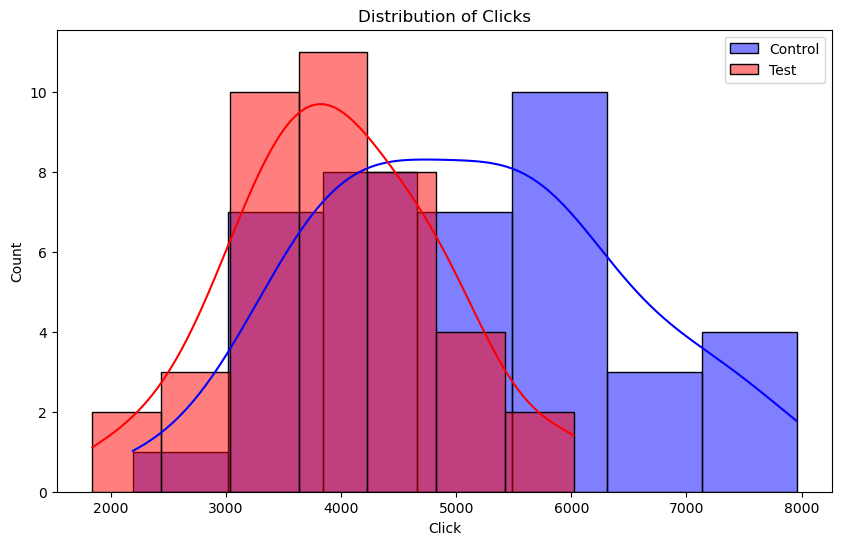

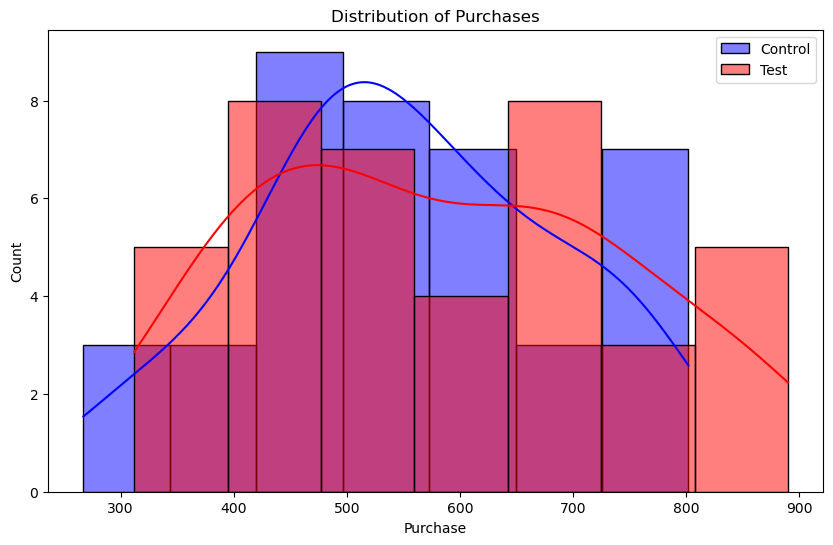

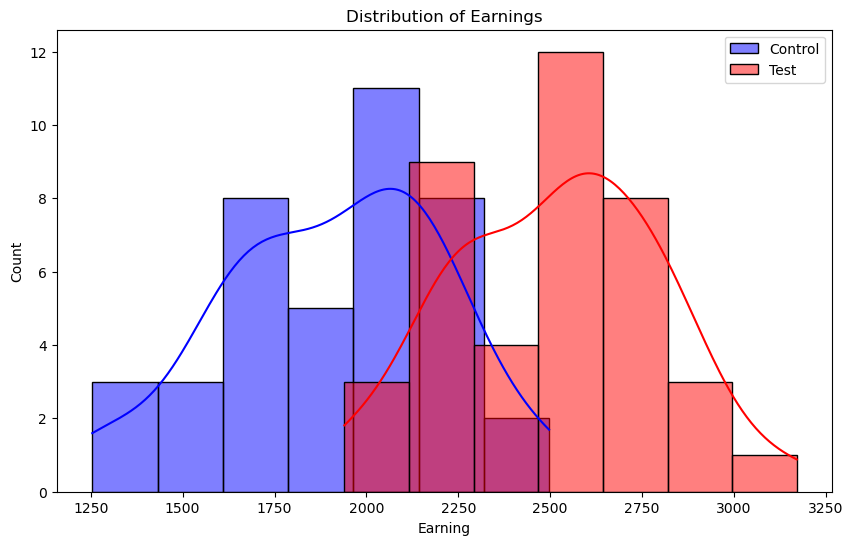

In [19]:
# Visualize distributions
plt.figure(figsize=(10, 6))
sns.histplot(control_df["Click"], color='blue', kde=True, label='Control')
sns.histplot(test_df["Click"], color='red', kde=True, label='Test')
plt.title('Distribution of Clicks')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(control_df["Purchase"], color='blue', kde=True, label='Control')
sns.histplot(test_df["Purchase"], color='red', kde=True, label='Test')
plt.title('Distribution of Purchases')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(control_df["Earning"], color='blue', kde=True, label='Control')
sns.histplot(test_df["Earning"], color='red', kde=True, label='Test')
plt.title('Distribution of Earnings')
plt.legend()
plt.show()

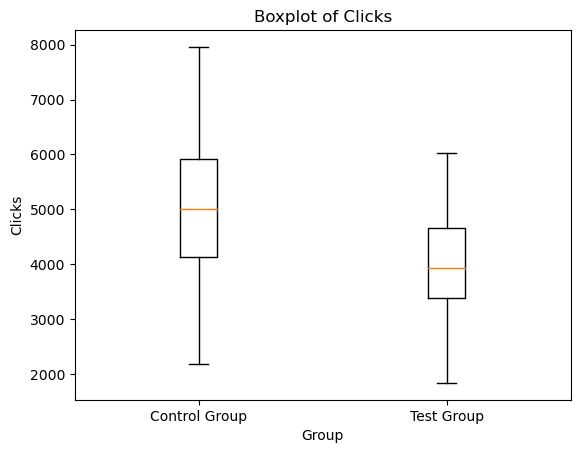

In [20]:
# Define the click data
control_clicks = control_df['Click']
test_clicks = test_df['Click']

# Concatenate the click data
all_clicks = np.concatenate([control_clicks, test_clicks])

# Create a boxplot
plt.boxplot([control_clicks, test_clicks], labels=['Control Group', 'Test Group'])
plt.title('Boxplot of Clicks')
plt.xlabel('Group')
plt.ylabel('Clicks')
plt.show()

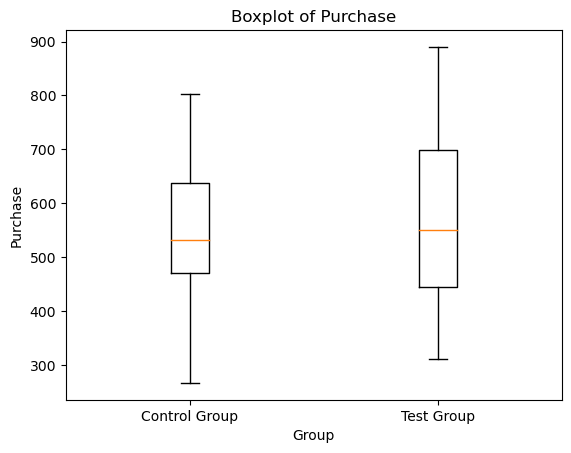

In [21]:
# Define the Purchase data
control_purchases = control_df['Purchase']
test_purchases = test_df['Purchase']

# Concatenate the Purchase data
all_purchases = np.concatenate([control_purchases, test_purchases])

# Create a boxplot
plt.boxplot([control_purchases, test_purchases], labels=['Control Group', 'Test Group'])
plt.title('Boxplot of Purchase')
plt.xlabel('Group')
plt.ylabel('Purchase')
plt.show()

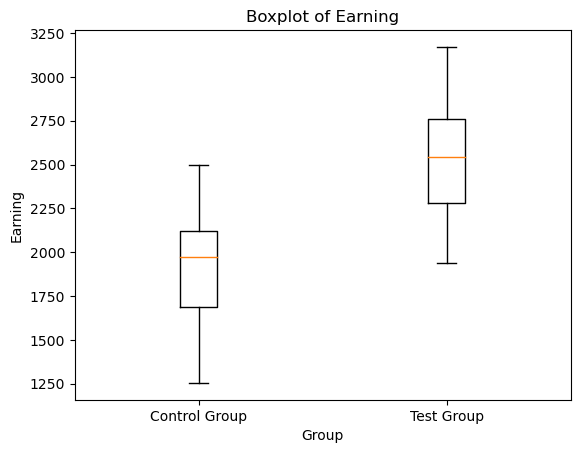

In [22]:
# Define the Earning data
control_earnings = control_df['Earning']
test_earnings = test_df['Earning']

# Concatenate the Earning data
all_earnings = np.concatenate([control_earnings, test_earnings])

# Create a boxplot
plt.boxplot([control_earnings, test_earnings], labels=['Control Group', 'Test Group'])
plt.title('Boxplot of Earning')
plt.xlabel('Group')
plt.ylabel('Earning')
plt.show()

In [23]:
# Calculate Click-Through-Rate (CTR) for each group
control_df['CTR'] = control_df['Click'] / control_df['Impression'] 
test_df['CTR'] = test_df['Click'] / test_df['Impression'] 

# Calculate Conversion for each group
control_df['Conversion Rate'] = control_df['Purchase'] / control_df['Click']
test_df['Conversion Rate'] = test_df['Purchase'] / test_df['Click'] 

# Calculate ROI for each group  
control_df["ROI"] = control_df["Earning"] / control_df["Purchase"]
test_df["ROI"] = test_df["Earning"] / test_df["Purchase"]

# Calculate Click-Through-Rate (CTR)% for each group
control_df['CTR%'] = control_df['CTR'] * 100
test_df['CTR%'] = test_df['CTR'] * 100

# Calculate Conversion Rate for each group
control_df['Conversion Rate%'] = control_df['Conversion Rate'] * 100
test_df['Conversion Rate%'] = test_df['Conversion Rate'] * 100

# Group data by group type (control or test) and calculate mean CTR and Conversion Rate
control_ctr_mean = control_df['CTR%'].mean()
control_conversion_mean = control_df['Conversion Rate%'].mean()
control_roi_mean = control_df['ROI'].mean()
test_ctr_mean = test_df['CTR%'].mean()
test_conversion_mean = test_df['Conversion Rate%'].mean()
test_roi_mean = test_df['ROI'].mean()

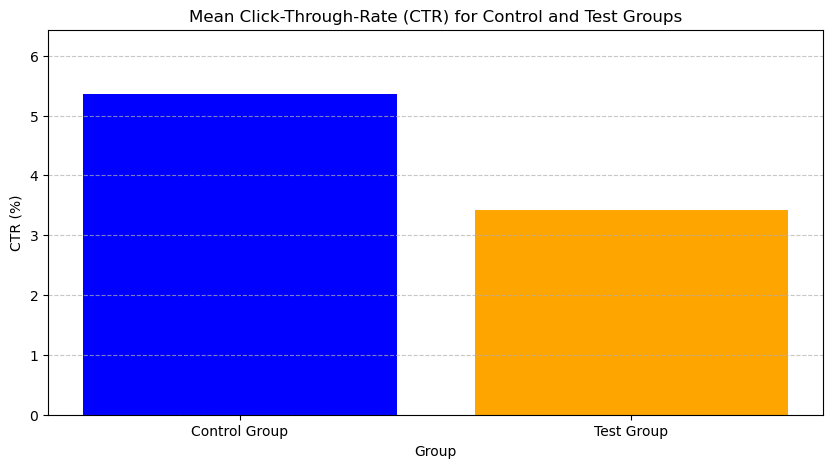

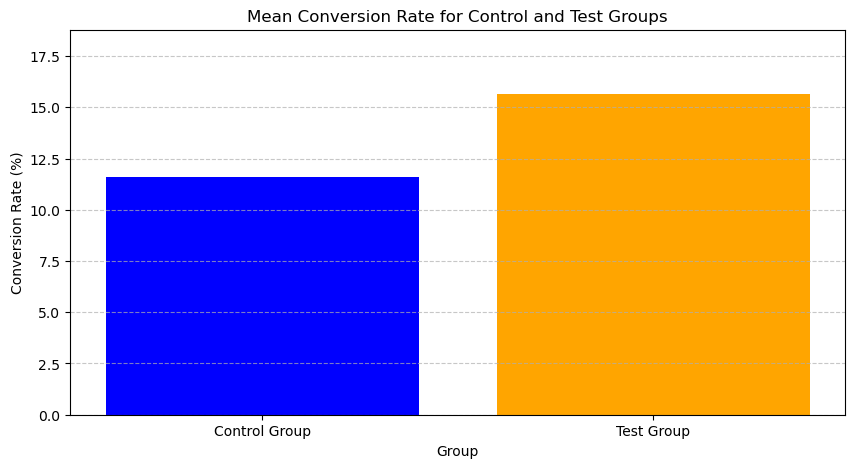

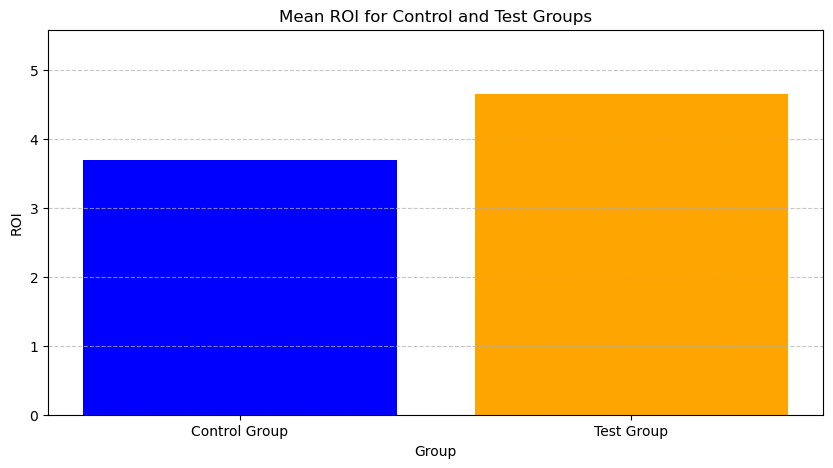

In [24]:
# Define group labels and values
groups = ['Control Group', 'Test Group']
ctr_values = [control_ctr_mean, test_ctr_mean]
conversion_rate_values = [control_conversion_mean, test_conversion_mean]
roi_values = [control_roi_mean, test_roi_mean]

# Create bar chart for Click-Through-Rate (CTR)
plt.figure(figsize=(10, 5))
plt.bar(groups, ctr_values, color=['blue', 'orange'])
plt.title('Mean Click-Through-Rate (CTR) for Control and Test Groups')
plt.xlabel('Group')
plt.ylabel('CTR (%)')
plt.ylim(0, max(ctr_values) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Create bar chart for Conversion Rate
plt.figure(figsize=(10, 5))
plt.bar(groups, conversion_rate_values, color=['blue', 'orange'])
plt.title('Mean Conversion Rate for Control and Test Groups')
plt.xlabel('Group')
plt.ylabel('Conversion Rate (%)')
plt.ylim(0, max(conversion_rate_values) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Create bar chart for ROI Rate
plt.figure(figsize=(10, 5))
plt.bar(groups, roi_values, color=['blue', 'orange'])
plt.title('Mean ROI for Control and Test Groups')
plt.xlabel('Group')
plt.ylabel('ROI')
plt.ylim(0, max(roi_values) * 1.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

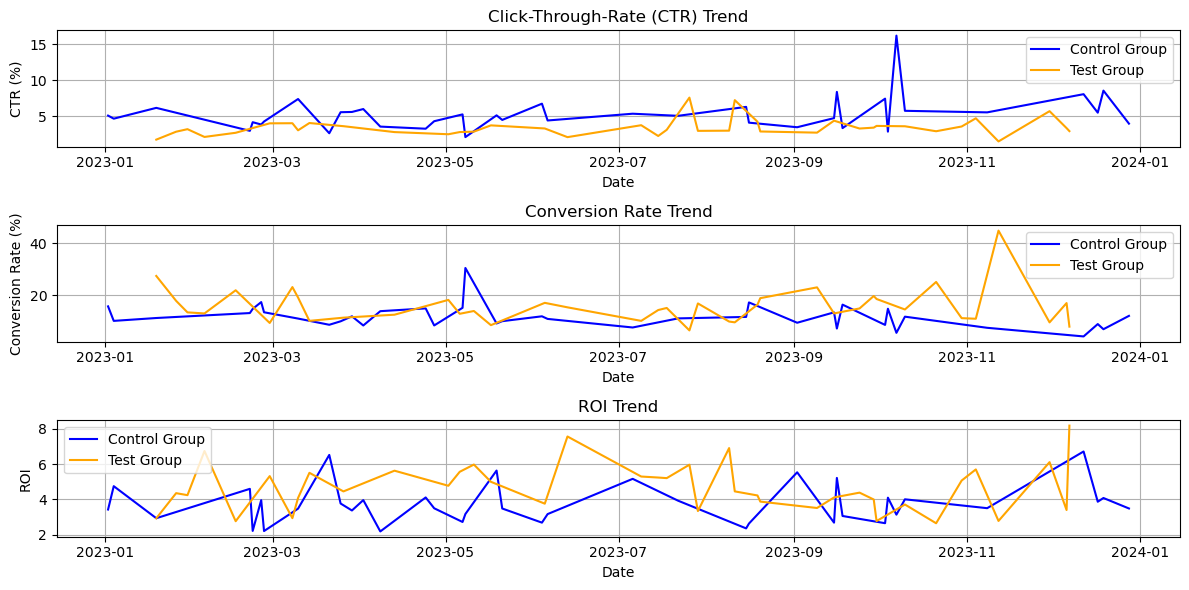

In [25]:
# Define the date range
start_date = datetime(2023, 1, 1)
end_date = datetime(2023, 12, 31)

# Generate random dates for both dataframes
random_dates_control = [start_date + timedelta(days=random.randint(0, (end_date - start_date).days)) for _ in range(len(control_df))]
random_dates_test = [start_date + timedelta(days=random.randint(0, (end_date - start_date).days)) for _ in range(len(test_df))]

# Add 'Date' column
control_df['Date'] = random_dates_control
test_df['Date'] = random_dates_test

# Group by date and calculate mean CTR and Conversion rate
control_ctr_trend = control_df.groupby('Date')['CTR%'].mean()
test_ctr_trend = test_df.groupby('Date')['CTR%'].mean()

control_conversion_trend = control_df.groupby('Date')['Conversion Rate%'].mean()
test_conversion_trend = test_df.groupby('Date')['Conversion Rate%'].mean()

control_roi_trend = control_df.groupby('Date')['ROI'].mean()
test_roi_trend = test_df.groupby('Date')['ROI'].mean()

# Plotting
plt.figure(figsize=(12, 6))

# Plot CTR trends for each group
plt.subplot(3, 1, 1)
plt.plot(control_ctr_trend, label='Control Group', color='blue')
plt.plot(test_ctr_trend, label='Test Group', color='orange')
plt.title('Click-Through-Rate (CTR) Trend')
plt.xlabel('Date')
plt.ylabel('CTR (%)')
plt.legend()
plt.grid(True)

# Plot Conversion rate trends for each group
plt.subplot(3, 1, 2)
plt.plot(control_conversion_trend, label='Control Group', color='blue')
plt.plot(test_conversion_trend, label='Test Group', color='orange')
plt.title('Conversion Rate Trend')
plt.xlabel('Date')
plt.ylabel('Conversion Rate (%)')
plt.legend()
plt.grid(True)

# Plot Conversion rate trends for each group
plt.subplot(3, 1, 3)
plt.plot(control_roi_trend, label='Control Group', color='blue')
plt.plot(test_roi_trend, label='Test Group', color='orange')
plt.title('ROI Trend')
plt.xlabel('Date')
plt.ylabel('ROI')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Analysis of Facebook Ad Features</h2>

<h3 style="font-family: Helvetica, Arial, sans-serif; font-size: 16px; font-weight: bold; text-align: justify; color: #555;">1. Click Performance:</h3>
<ul style="font-family: Arial, sans-serif; font-size: 14px; color: #555;">
  <li><b>Control Group (Maximum Bidding):</b>
    <ul>
      <li>Higher mean and median clicks compared to the test group.</li>
      <li>Higher standard deviation, indicating greater variability in click counts.</li>
      <li>Maximum number of clicks observed is higher.</li>
      <li>Minimum number of clicks observed is higher than the test group.</li>
    </ul>
  </li>
  <li><b>Test Group (Average Bidding):</b>
    <ul>
      <li>Lower mean and median clicks compared to the control group.</li>
      <li>Lower variability in click counts.</li>
      <li>Lower maximum number of clicks observed.</li>
      <li>Lower minimum number of clicks observed compared to the control group.</li>
    </ul>
  </li>
</ul>

<h3 style="font-family: Helvetica, Arial, sans-serif; font-size: 16px; font-weight: bold; text-align: justify; color: #555;">2. Purchase Performance:</h3>
<ul style="font-family: Arial, sans-serif; font-size: 14px; color: #555;">
  <li><b>Control Group (Maximum Bidding):</b>
    <ul>
      <li>Total purchases: Lower than the test group.</li>
      <li>Mean and median number of purchases: Lower than the test group.</li>
    </ul>
  </li>
  <li><b>Test Group (Average Bidding):</b>
    <ul>
      <li>Total purchases: Higher than the control group.</li>
      <li>Mean and median number of purchases: Higher than the control group.</li>
    </ul>
  </li>
</ul>

<h3 style="font-family: Helvetica, Arial, sans-serif; font-size: 16px; font-weight: bold; text-align: justify; color: #555;">3. Earnings Performance:</h3>
<ul style="font-family: Arial, sans-serif; font-size: 14px; color: #555;">
  <li><b>Control Group (Maximum Bidding):</b>
    <ul>
      <li>Total earnings: Lower than the test group.</li>
      <li>Mean and median earnings: Lower than the test group.</li>
    </ul>
  </li>
  <li><b>Test Group (Average Bidding):</b>
    <ul>
      <li>Total earnings: Higher than the control group.</li>
      <li>Mean and median earnings: Higher than the control group.</li>
    </ul>
  </li>
</ul>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Conclusion:</h2>
<ul style="font-family: Arial, sans-serif; font-size: 14px; color: #555;">
  <li>The average bidding strategy outperforms the maximum bidding strategy in terms of generating purchases and earnings.</li>
  <li>While the maximum bidding strategy leads to higher click counts, it does not translate into higher purchases or earnings compared to the average bidding strategy.</li>
  <li>Further analysis and hypothesis testing are recommended to confirm the statistical significance of these findings and inform future advertising strategy decisions.</li>
</ul>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Step 5: Inferential Analysis</h2>

- A/B Hypothesis Testing: We aim to compare the Click-Through-Rate (CTR), Conversion Rate, and Return on Investment (ROI) between the Control and Test groups to determine if there are statistically significant differences between them. This helps us understand the impact of the experimental changes introduced in the Test group compared to the Control group.
- Two-Sample Hypothesis Testing: By conducting two-sample hypothesis tests for Click, Purchase, and Earning, we seek to ascertain if there are significant variations in these metrics between the Control and Test groups. This allows us to gauge the effectiveness of the experimental modifications in influencing user behavior and financial outcomes.

These analyses will provide valuable insights into the effectiveness of the experimental variations and their implications on user behavior and financial outcomes.

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Formulated Hypotheses:</h2>
<p style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">Null Hypothesis ($H_0$): The mean Click-Through-Rate (CTR) for the Control group is equal to or less than the Test Group.</p>
<p style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">Alternative Hypothesis ($H_A$): The mean Click-Through-Rate (CTR) for the Control group is higher than the Test Group.</p>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Significance Level:</h2>
<p style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">Significance level: 5%</p>

In [26]:
# Define the group data
control_ctr = control_df['CTR']
test_ctr = test_df['CTR']

#hypothesis test, A/B test
t_statistic, p_value = stats.ttest_ind(a=control_ctr, b=test_ctr, equal_var=False)

# Calculate the difference in means
mean_difference = np.mean(control_ctr) - np.mean(test_ctr)

# Calculate the standard error of the sampling distribution
n_control = len(control_ctr)
n_test = len(test_ctr)
std_control = np.std(control_ctr, ddof=1)
std_test = np.std(test_ctr, ddof=1)
std_error = np.sqrt((std_control**2 / n_control) + (std_test**2 / n_test))

# Set the desired level of confidence
confidence_level = 0.95

# Calculate the critical value from the t-distribution
df = n_control + n_test - 2  # degrees of freedom
critical_value = stats.t.ppf((1 + confidence_level) / 2, df)

# Calculate the margin of error
margin_of_error = critical_value * std_error

# Calculate the confidence interval
lower_bound = mean_difference - margin_of_error
upper_bound = mean_difference + margin_of_error

significance_level = 0.05

# Display the results
print("P-value for A/B Test (Click-Through-Rate):", p_value)

if p_value <= significance_level:
    print("Reject the null hypothesis. The mean Click-Through-Rate (CTR) for the Control group is higher than the Test Group.")
else:
    print("Fail to reject the null hypothesis. The mean Click-Through-Rate (CTR) for the Control group is equal to or less than the Test Group.")
    
print("T-statistic for A/B Test (Click-Through-Rate):", t_statistic)
print("Difference in means (Click-Through-Rate):", mean_difference)
print("Standard Error of Sampling Distribution (Click-Through-Rate):", std_error)
print("Critical Value from t-Distribution (Click-Through-Rate):", critical_value)
print("Margin of Error (Click-Through-Rate):", margin_of_error)
print(f"Confidence Interval for Difference in Means (Click-Through-Rate) at {confidence_level}: ({lower_bound}, {upper_bound})")

P-value for A/B Test (Click-Through-Rate): 4.222533643278749e-05
Reject the null hypothesis. The mean Click-Through-Rate (CTR) for the Control group is higher than the Test Group.
T-statistic for A/B Test (Click-Through-Rate): 4.437840725333371
Difference in means (Click-Through-Rate): 0.019441747806953208
Standard Error of Sampling Distribution (Click-Through-Rate): 0.004380902562809472
Critical Value from t-Distribution (Click-Through-Rate): 1.990847068555052
Margin of Error (Click-Through-Rate): 0.00872170702479455
Confidence Interval for Difference in Means (Click-Through-Rate) at 0.95: (0.010720040782158657, 0.02816345483174776)


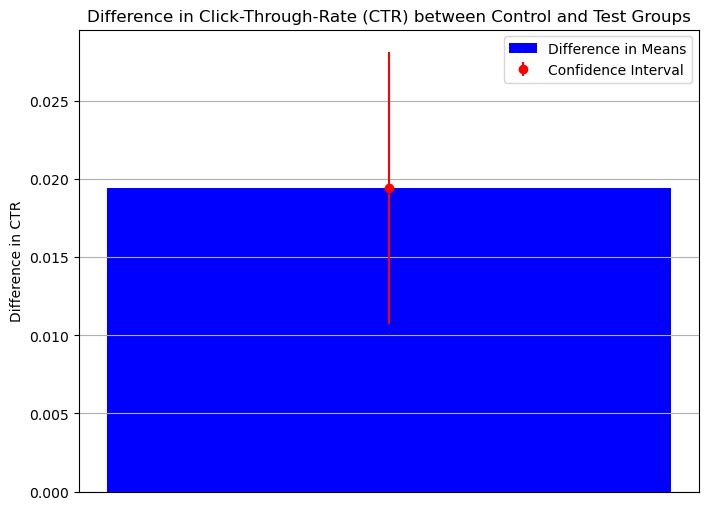

In [27]:
# Plotting the difference in means and confidence interval
plt.figure(figsize=(8, 6))

# Plot the difference in means
plt.bar(0, mean_difference, color='blue', label='Difference in Means')

# Plot the confidence interval
plt.errorbar(0, mean_difference, yerr=margin_of_error, fmt='o', color='red', label='Confidence Interval')

# Add labels and title
plt.title('Difference in Click-Through-Rate (CTR) between Control and Test Groups')
plt.ylabel('Difference in CTR')
plt.xticks([], [])
plt.legend()

plt.grid(True)
plt.show()

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Formulated Hypotheses:</h2>
<p style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">Null Hypothesis ($H_0$): The mean Conversion Rate for the Control group is equal to or more than the Test Group.</p>
<p style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">Alternative Hypothesis ($H_A$): The mean Conversion Rate for the Control group is lower than the Test Group.</p>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Significance Level:</h2>
<p style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">Significance level: 5%</p>

In [28]:
# Define the group data
control_conversion = control_df['Conversion Rate']
test_conversion = test_df['Conversion Rate']

#hypothesis test, A/B test
t_statistic, p_value = stats.ttest_ind(a=control_conversion, b=test_conversion, equal_var=False)

# Calculate the difference in means
mean_difference = np.mean(control_conversion) - np.mean(test_conversion)

# Calculate the standard error of the sampling distribution
n_control = len(control_conversion)
n_test = len(test_conversion)
std_control = np.std(control_conversion, ddof=1)
std_test = np.std(test_conversion, ddof=1)
std_error = np.sqrt((std_control**2 / n_control) + (std_test**2 / n_test))

# Set the desired level of confidence
confidence_level = 0.95

# Calculate the critical value from the t-distribution
df = n_control + n_test - 2  # degrees of freedom
critical_value = stats.t.ppf((1 + confidence_level) / 2, df)

# Calculate the margin of error
margin_of_error = critical_value * std_error

# Calculate the confidence interval
lower_bound = mean_difference - margin_of_error
upper_bound = mean_difference + margin_of_error

significance_level = 0.05

# Display the results
print("P-value for A/B Test (Conversion Rate):", p_value)

if p_value <= significance_level:
    print("Reject the null hypothesis. The mean Conversion Rate for the Control group is lower than the Test Group.")
else:
    print("Fail to reject the null hypothesis. The mean Conversion Rate for the Control group is equal to or more than the Test Group.")
    
print("T-statistic for A/B Test (Conversion Rate):", t_statistic)
print("Difference in means (Conversion Rate):", mean_difference)
print("Standard Error of Sampling Distribution (Conversion Rate):", std_error)
print("Critical Value from t-Distribution (Conversion Rate):", critical_value)
print("Margin of Error (Conversion Rate):", margin_of_error)
print(f"Confidence Interval for Difference in Means (Conversion Rate) at {confidence_level}: ({lower_bound}, {upper_bound})")


P-value for A/B Test (Conversion Rate): 0.0025208815613046824
Reject the null hypothesis. The mean Conversion Rate for the Control group is lower than the Test Group.
T-statistic for A/B Test (Conversion Rate): -3.1373827215830916
Difference in means (Conversion Rate): -0.040627253292490645
Standard Error of Sampling Distribution (Conversion Rate): 0.012949409395609398
Critical Value from t-Distribution (Conversion Rate): 1.990847068555052
Margin of Error (Conversion Rate): 0.025780293734768218
Confidence Interval for Difference in Means (Conversion Rate) at 0.95: (-0.06640754702725886, -0.014846959557722427)


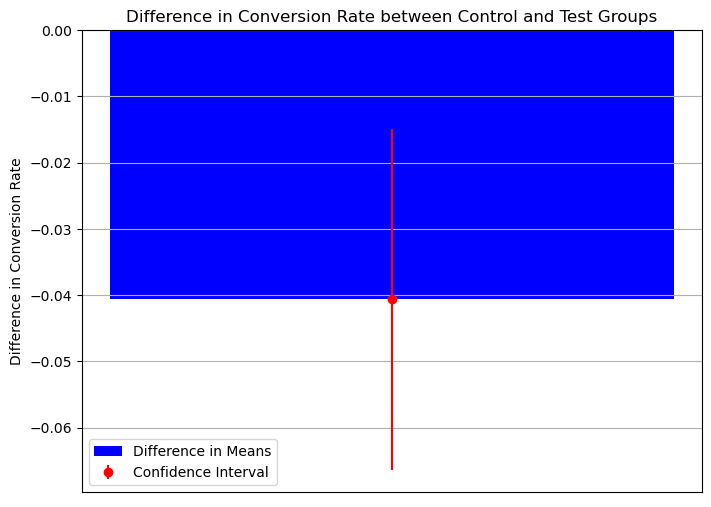

In [29]:
# Plotting the difference in means and confidence interval
plt.figure(figsize=(8, 6))

# Plot the difference in means
plt.bar(0, mean_difference, color='blue', label='Difference in Means')

# Plot the confidence interval
plt.errorbar(0, mean_difference, yerr=margin_of_error, fmt='o', color='red', label='Confidence Interval')

# Add labels and title
plt.title('Difference in Conversion Rate between Control and Test Groups')
plt.ylabel('Difference in Conversion Rate')
plt.xticks([], [])
plt.legend()

plt.grid(True)
plt.show()

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Formulated Hypotheses:</h2>
<p style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">Null Hypothesis ($H_0$): The mean Return on Investment (ROI) for the Control group is equal to or more than the Test Group.</p>
<p style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">Alternative Hypothesis ($H_A$): The mean Return on Investment (ROI) for the Control group is lower than the Test Group.</p>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Significance Level:</h2>
<p style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">Significance level: 5%</p>

In [30]:
# Define the group data
control_roi = control_df['ROI']
test_roi = test_df['ROI']

#hypothesis test, A/B test
t_statistic, p_value = stats.ttest_ind(a=control_roi, b=test_roi, equal_var=False)

# Calculate the difference in means
mean_difference = np.mean(control_roi) - np.mean(test_roi)

# Calculate the standard error of the sampling distribution
n_control = len(control_roi)
n_test = len(test_roi)
std_control = np.std(control_roi, ddof=1)
std_test = np.std(test_roi, ddof=1)
std_error = np.sqrt((std_control**2 / n_control) + (std_test**2 / n_test))

# Set the desired level of confidence
confidence_level = 0.95

# Calculate the critical value from the t-distribution
df = n_control + n_test - 2  # degrees of freedom
critical_value = stats.t.ppf((1 + confidence_level) / 2, df)

# Calculate the margin of error
margin_of_error = critical_value * std_error

# Calculate the confidence interval
lower_bound = mean_difference - margin_of_error
upper_bound = mean_difference + margin_of_error

significance_level = 0.05

# Display the results
print("P-value for A/B Test (ROI):", p_value)

if p_value <= significance_level:
    print("Reject the null hypothesis. The mean Return on Investment (ROI) for the Control group is lower than the Test Group.")
else:
    print("Fail to reject the null hypothesis. The mean Return on Investment (ROI) for the Control group is equal to or more than the Test Group.")
    
print("T-statistic for A/B Test (ROI):", t_statistic)
print("Difference in means (ROI):", mean_difference)
print("Standard Error of Sampling Distribution (ROI):", std_error)
print("Critical Value from t-Distribution (ROI):", critical_value)
print("Margin of Error (ROI):", margin_of_error)
print(f"Confidence Interval for Difference in Means (ROI) at {confidence_level}: ({lower_bound}, {upper_bound})")


P-value for A/B Test (ROI): 0.0009485763415170098
Reject the null hypothesis. The mean Return on Investment (ROI) for the Control group is lower than the Test Group.
T-statistic for A/B Test (ROI): -3.440477034619262
Difference in means (ROI): -0.9654400886784646
Standard Error of Sampling Distribution (ROI): 0.2806122752641208
Critical Value from t-Distribution (ROI): 1.990847068555052
Margin of Error (ROI): 0.5586561256101382
Confidence Interval for Difference in Means (ROI) at 0.95: (-1.524096214288603, -0.4067839630683264)


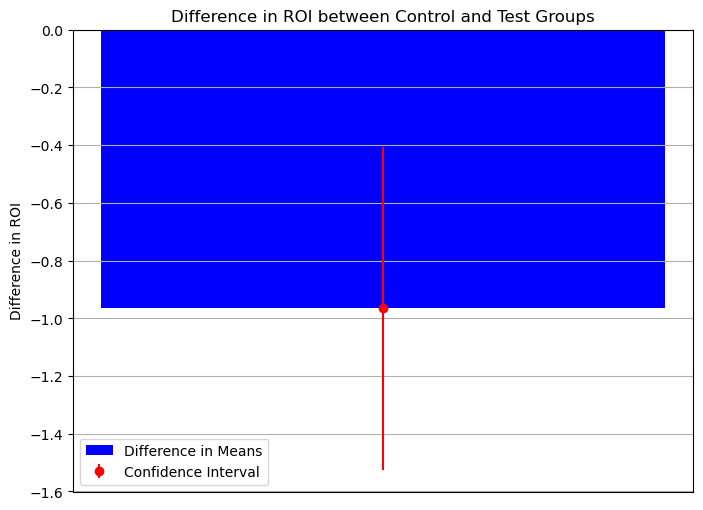

In [31]:
# Plotting the difference in means and confidence interval
plt.figure(figsize=(8, 6))

# Plot the difference in means
plt.bar(0, mean_difference, color='blue', label='Difference in Means')

# Plot the confidence interval
plt.errorbar(0, mean_difference, yerr=margin_of_error, fmt='o', color='red', label='Confidence Interval')

# Add labels and title
plt.title('Difference in ROI between Control and Test Groups')
plt.ylabel('Difference in ROI')
plt.xticks([], [])
plt.legend()

plt.grid(True)
plt.show()

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Formulated Hypotheses:</h2>
<p style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">Null Hypothesis ($H_0$): There is no difference in the mean of Purchase between the Control group and the Test Group.</p>
<p style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">Alternative Hypothesis ($H_A$): There is a difference in the mean of Purchase between the Control group and the Test Group.</p>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Significance Level:</h2>
<p style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">Significance level: 5%</p>

In [32]:
# Define the group data
control_purchases = control_df['Purchase']
test_purchases = test_df['Purchase']

#hypothesis test, A/B test
t_statistic, p_value = stats.ttest_ind(a=control_purchases, b=test_purchases, equal_var=False)

# Calculate the difference in means
mean_difference = np.mean(control_purchases) - np.mean(test_purchases)

# Calculate the standard error of the sampling distribution
n_control = len(control_purchases)
n_test = len(test_purchases)
std_control = np.std(control_purchases, ddof=1)
std_test = np.std(test_purchases, ddof=1)
std_error = np.sqrt((std_control**2 / n_control) + (std_test**2 / n_test))

# Set the desired level of confidence
confidence_level = 0.95

# Calculate the critical value from the t-distribution
df = n_control + n_test - 2  # degrees of freedom
critical_value = stats.t.ppf((1 + confidence_level) / 2, df)

# Calculate the margin of error
margin_of_error = critical_value * std_error

# Calculate the confidence interval
lower_bound = mean_difference - margin_of_error
upper_bound = mean_difference + margin_of_error

significance_level = 0.05

# Display the results
print("P-value for A/B Test (Purchase Rate):", p_value)

if p_value <= significance_level:
    print("Reject the null hypothesis. There is a difference in the mean of Purchase between the Control group and the Test Group.")
else:
    print("Fail to reject the null hypothesis. There is no difference in the mean of Purchase between the Control group and the Test Group.")
    
print("T-statistic for A/B Test (Purchase Rate):", t_statistic)
print("Difference in means (Purchase Rate):", mean_difference)
print("Standard Error of Sampling Distribution (Purchase Rate):", std_error)
print("Critical Value from t-Distribution (Purchase Rate):", critical_value)
print("Margin of Error (Purchase Rate):", margin_of_error)
print(f"Confidence Interval for Difference in Means (Purchase Rate) at {confidence_level}: ({lower_bound}, {upper_bound})")

P-value for A/B Test (Purchase Rate): 0.35041782480263783
Fail to reject the null hypothesis. There is no difference in the mean of Purchase between the Control group and the Test Group.
T-statistic for A/B Test (Purchase Rate): -0.9396022967737262
Difference in means (Purchase Rate): -31.149999999999977
Standard Error of Sampling Distribution (Purchase Rate): 33.152324240754254
Critical Value from t-Distribution (Purchase Rate): 1.990847068555052
Margin of Error (Purchase Rate): 66.0012075304922
Confidence Interval for Difference in Means (Purchase Rate) at 0.95: (-97.15120753049217, 34.85120753049222)


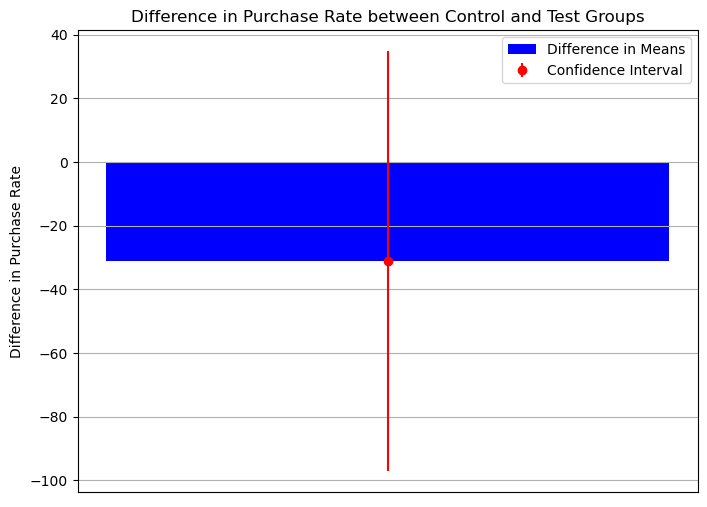

In [33]:
# Plotting the difference in means and confidence interval
plt.figure(figsize=(8, 6))

# Plot the difference in means
plt.bar(0, mean_difference, color='blue', label='Difference in Means')

# Plot the confidence interval
plt.errorbar(0, mean_difference, yerr=margin_of_error, fmt='o', color='red', label='Confidence Interval')

# Add labels and title
plt.title('Difference in Purchase Rate between Control and Test Groups')
plt.ylabel('Difference in Purchase Rate')
plt.xticks([], [])
plt.legend()

plt.grid(True)
plt.show()

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Formulated Hypotheses:</h2>
<p style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">Null Hypothesis ($H_0$): There is no difference in the mean of Earning between the Control group and the Test Group.</p>
<p style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">Alternative Hypothesis ($H_A$): There is a difference in the mean of Earning between the Control group and the Test Group.</p>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Significance Level:</h2>
<p style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">Significance level: 5%</p>

In [34]:
# Define the group data
control_earning = control_df['Earning']
test_earning = test_df['Earning']

#hypothesis test, A/B test
t_statistic, p_value = stats.ttest_ind(a=control_earning, b=test_earning, equal_var=False)

# Calculate the difference in means
mean_difference = np.mean(control_earning) - np.mean(test_earning)

# Calculate the standard error of the sampling distribution
n_control = len(control_earning)
n_test = len(test_earning)
std_control = np.std(control_earning, ddof=1)
std_test = np.std(test_earning, ddof=1)
std_error = np.sqrt((std_control**2 / n_control) + (std_test**2 / n_test))

# Set the desired level of confidence
confidence_level = 0.95

# Calculate the critical value from the t-distribution
df = n_control + n_test - 2  # degrees of freedom
critical_value = stats.t.ppf((1 + confidence_level) / 2, df)

# Calculate the margin of error
margin_of_error = critical_value * std_error

# Calculate the confidence interval
lower_bound = mean_difference - margin_of_error
upper_bound = mean_difference + margin_of_error


significance_level = 0.05

# Display the results
print("P-value for A/B Test (Earning Rate):", p_value)

if p_value <= significance_level:
    print("Reject the null hypothesis. There is a difference in the mean of Earning between the Control group and the Test Group.")
else:
    print("Fail to reject the null hypothesis. There is no difference in the mean of Earning between the Control group and the Test Group.")
    
print("T-statistic for A/B Test (Earning Rate):", t_statistic)
print("Difference in means (Earning Rate):", mean_difference)
print("Standard Error of Sampling Distribution (Earning Rate):", std_error)
print("Critical Value from t-Distribution (Earning Rate):", critical_value)
print("Margin of Error (Earning Rate):", margin_of_error)
print(f"Confidence Interval for Difference in Means (Earning Rate) at {confidence_level}: ({lower_bound}, {upper_bound})")

P-value for A/B Test (Earning Rate): 3.585482309320112e-14
Reject the null hypothesis. There is a difference in the mean of Earning between the Control group and the Test Group.
T-statistic for A/B Test (Earning Rate): -9.256092651165
Difference in means (Earning Rate): -606.3500000000001
Standard Error of Sampling Distribution (Earning Rate): 65.50820339116669
Critical Value from t-Distribution (Earning Rate): 1.990847068555052
Margin of Error (Earning Rate): 130.41681468761232
Confidence Interval for Difference in Means (Earning Rate) at 0.95: (-736.7668146876124, -475.9331853123878)


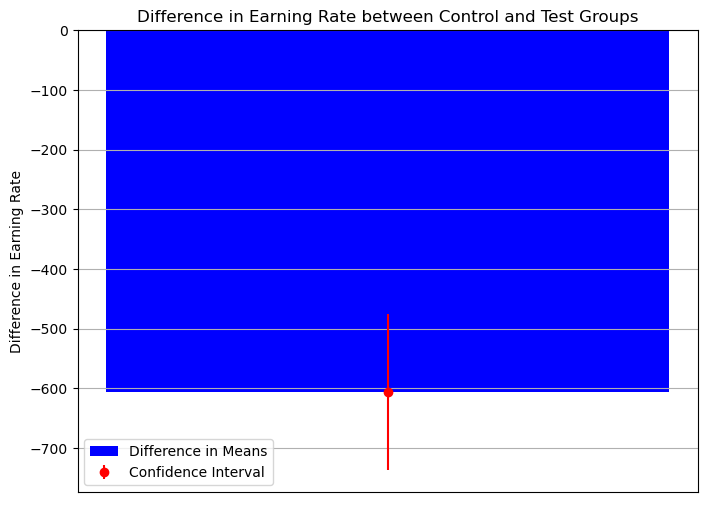

In [35]:
# Plotting the difference in means and confidence interval
plt.figure(figsize=(8, 6))

# Plot the difference in means
plt.bar(0, mean_difference, color='blue', label='Difference in Means')

# Plot the confidence interval
plt.errorbar(0, mean_difference, yerr=margin_of_error, fmt='o', color='red', label='Confidence Interval')

# Add labels and title
plt.title('Difference in Earning Rate between Control and Test Groups')
plt.ylabel('Difference in Earning Rate')
plt.xticks([], [])
plt.legend()

plt.grid(True)
plt.show()

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Formulated Hypotheses:</h2>
<p style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">Null Hypothesis ($H_0$): There is no difference in the mean of Click between the Control group and the Test Group.</p>
<p style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">Alternative Hypothesis ($H_A$): There is a difference in the mean of Click between the Control group and the Test Group.</p>

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 18px; font-weight: bold; text-align: justify; color: #555;">Significance Level:</h2>
<p style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">Significance level: 5%</p>

In [36]:
# Define the group data
control_click = control_df['Click']
test_click = test_df['Click']

#hypothesis test, A/B test
t_statistic, p_value = stats.ttest_ind(a=control_click, b=test_click, equal_var=False)

# Calculate the difference in means
mean_difference = np.mean(control_click) - np.mean(test_click)

# Calculate the standard error of the sampling distribution
n_control = len(control_click)
n_test = len(test_click)
std_control = np.std(control_click, ddof=1)
std_test = np.std(test_click, ddof=1)
std_error = np.sqrt((std_control**2 / n_control) + (std_test**2 / n_test))

# Set the desired level of confidence
confidence_level = 0.95

# Calculate the critical value from the t-distribution
df = n_control + n_test - 2  # degrees of freedom
critical_value = stats.t.ppf((1 + confidence_level) / 2, df)

# Calculate the margin of error
margin_of_error = critical_value * std_error

# Calculate the confidence interval
lower_bound = mean_difference - margin_of_error
upper_bound = mean_difference + margin_of_error

significance_level = 0.05

# Display the results
print("P-value for A/B Test (Clicks):", p_value)

if p_value <= significance_level:
    print("Reject the null hypothesis. There is a difference in the mean of Click between the Control group and the Test Group.")
else:
    print("Fail to reject the null hypothesis. There is no difference in the mean of Click between the Control group and the Test Group.")
    
print("T-statistic for A/B Test (Clicks):", t_statistic)
print("Difference in means (Clicks):", mean_difference)
print("Standard Error of Sampling Distribution (Clicks):", std_error)
print("Critical Value from t-Distribution (Clicks):", critical_value)
print("Margin of Error (Clicks):", margin_of_error)
print(f"Confidence Interval for Difference in Means (Clicks) at {confidence_level}: ({lower_bound}, {upper_bound})")

P-value for A/B Test (Clicks): 3.4713015172897035e-05
Reject the null hypothesis. There is a difference in the mean of Click between the Control group and the Test Group.
T-statistic for A/B Test (Clicks): 4.4265730933875185
Difference in means (Clicks): 1133.0749999999998
Standard Error of Sampling Distribution (Clicks): 255.97114880868097
Critical Value from t-Distribution (Clicks): 1.990847068555052
Margin of Error (Clicks): 509.59941124043144
Confidence Interval for Difference in Means (Clicks) at 0.95: (623.4755887595684, 1642.6744112404313)


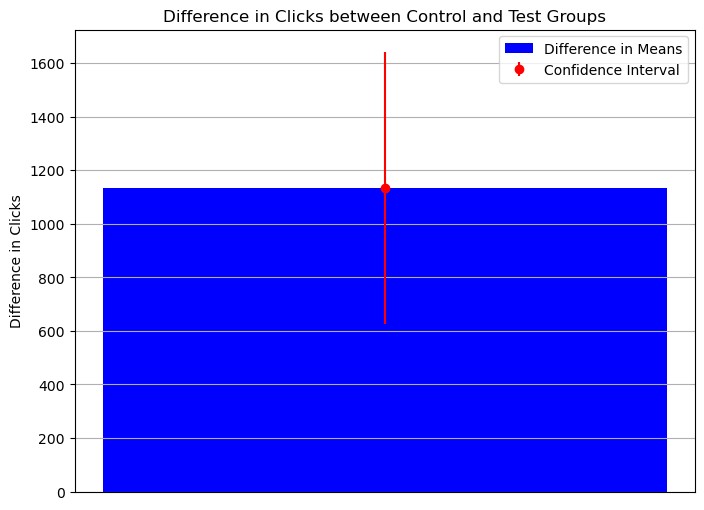

In [37]:
# Plotting the difference in means and confidence interval
plt.figure(figsize=(8, 6))

# Plot the difference in means
plt.bar(0, mean_difference, color='blue', label='Difference in Means')

# Plot the confidence interval
plt.errorbar(0, mean_difference, yerr=margin_of_error, fmt='o', color='red', label='Confidence Interval')

# Add labels and title
plt.title('Difference in Clicks between Control and Test Groups')
plt.ylabel('Difference in Clicks')
plt.xticks([], [])
plt.legend()

plt.grid(True)
plt.show()

<h2 style="font-family: Helvetica, Arial, sans-serif; font-size: 28px; font-weight: bold; text-align: justify; color: #555;">Conclusion</h2>

<ul style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">
  <li>The Control group outperformed the Test Group in terms of Click-Through-Rate and Total Clicks.</li>
  <li>The Test Group showed better performance in Conversion Rate, Return on Investment, and Earning Rate.</li>
  <li>There was no significant difference in Purchase Rate between the two groups.</li>
  <li>These results suggest that the Test Group's Average Bidding strategy may be more effective in generating conversions and earnings, while the Control group's Maximum Bidding strategy may lead to higher click counts.</li>
</ul>

<p style="font-family: Arial, sans-serif; font-size: 16px; color: #555;">Further analysis and experimentation are recommended to validate these findings and optimize future advertising strategies.</p>